# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* boxplot
* violinplot
* barplot
* countplot

Let's go through examples of each!

In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

In [3]:
import numpy as np

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

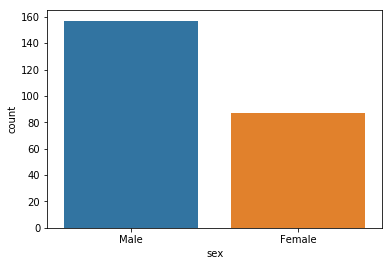

In [4]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

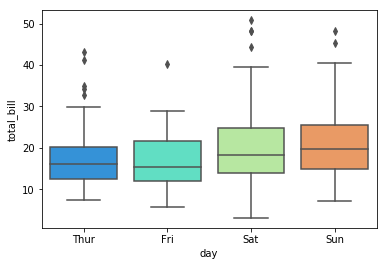

In [5]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

In [6]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

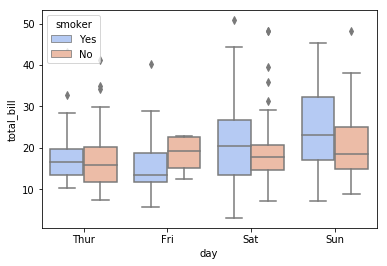

In [7]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

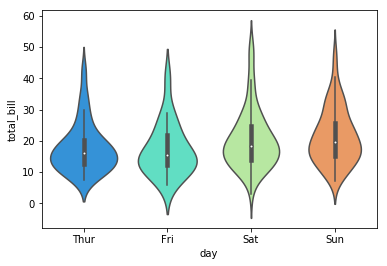

In [8]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

In [9]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

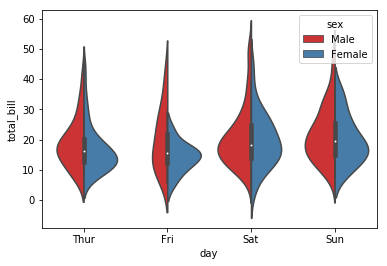

In [10]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## Boxplot

   * Barplot using seaborn
   * pandas's value_count()
   * Filtering using pandas

## For Colab
## Uploading directory.csv files from your local file system

`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name, the value is the data which was uploaded.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from pandas import DataFrame , read_csv
#for f in os.listdir('../input/'):
#    print (f.ljust(30)+ str(round(os.path.getsize('../input/'+f)/10000, 2)) + 'MB')

In [30]:
df = pd.read_csv('data/directory.csv')
df.head()

Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51  
1      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.42  
2      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.39  
3      NaN          NaN     GMT+04:00 Asia/Dubai      54.38     24.48  
4      NaN          NaN     GMT+04:00 Asia/Dubai      54.54     24.51

In [31]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
city_count  = df['City'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Starbucks in top 10 cities in the World')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [32]:
newyorkTimezone = df[df.Timezone == 'GMT-05:00 America/New_York']['City'].value_counts()[:10]
plt.figure(figsize=(15,5))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('Starbucks in top 10 cities in New yord timezone')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [33]:
plt.figure()
continents = df.Timezone.apply(lambda s: s.split('/')[0].split()[-1]).value_counts()
sns.barplot(continents.index, continents.values)
plt.title('# of Starbucks stores by Continent')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.show()

In [35]:
df[df.Timezone.str.contains('Etc')]

Brand  Store Number        Store Name Ownership Type  \
11298  Starbucks  15372-156845         Starbucks       Licensed   
11300  Starbucks  20785-207665         Starbucks       Licensed   
11305  Starbucks  32655-135773         Starbucks       Licensed   
11308  Starbucks  32372-135772         Starbucks       Licensed   
11309  Starbucks  32371-132206         Starbucks       Licensed   
11314  Starbucks  26271-244217  Aspendos Bulvari       Licensed   
11359  Starbucks  15827-165244         Starbucks       Licensed   

                                          Street Address         City  \
11298  Fener Mah. Tekelioglu Cad. TerraCity, No:55 K:...      Antalya   
11300  TahilPazari Mah. Kazim Ozalp Cad., Markantalya...      Antalya   
11305        Demircikara Mah. Ismet Gokcen Cad., No:10/A      Antalya   
11308                Kilicarslan Mah. Ataturk Cad. No:52      Antalya   
11309  Fener Mah. Tekelioglu Cad. S'hemall, Alisveris...      Antalya   
11314                       Tarim Mah. Aspendos Bulvari       Antalya   
11359  Egriçam Mah. Adnan Menderes Bulv. Mersin, Mari...  Mersin Icel   

      State/Province Country Postcode     Phone Number              Timezone  \
11298              7      TR     7100  0 242 324 69 04  GMT+000000 Etc/GMT+2   
11300              7      TR     7040              NaN  GMT+000000 Etc/GMT+2   
11305              7      TR     7100  0 242 316 25 35  GMT+000000 Etc/GMT+2   
11308              7      TR     7500  0 242 244 29 34  GMT+000000 Etc/GMT+2   
11309              7      TR     7160  0 242 324 77 54  GMT+000000 Etc/GMT+2   
11314              7      TR     7500              NaN  GMT+000000 Etc/GMT+2   
11359             33      TR    33310  0 324 330 00 72  GMT+000000 Etc/GMT+2   

       Longitude  Latitude  
11298      30.76     36.85  
11300      30.70     36.89  
11305      30.74     36.86  
11308      30.71     36.88  
11309      30.75     36.86  
11314      30.74     36.89  
11359      34.57     36.77

In [36]:
df.Timezone.str.contains('Etc').select(lambda x: x < 10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Timezone, dtype: bool

In [37]:
df.Timezone.str.contains('Etc').filter(items = [11314])

11314    True
Name: Timezone, dtype: bool